<center><h1>Hong_Seungil_HW1</h1></center>
<br>
<center><font size="4">Vertebral Column Data</font></center>

Name : Seungil Hong

Github Username : zonna19

USC ID : 2375832093

### (a) Download Data

Package imports

In [1]:
from scipy.io import arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the ARFF file
bin_cl = arff.loadarff('../data/vertebral_column_data/column_2C_weka.arff')

Get the Vertebral Column Data Set

In [2]:
# Create the DataFrame
df_bin = pd.DataFrame(bin_cl[0])
print(df_bin)

     pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0           63.027817    22.552586              39.609117     40.475232   
1           39.056951    10.060991              25.015378     28.995960   
2           68.832021    22.218482              50.092194     46.613539   
3           69.297008    24.652878              44.311238     44.644130   
4           49.712859     9.652075              28.317406     40.060784   
..                ...          ...                    ...           ...   
305         47.903565    13.616688              36.000000     34.286877   
306         53.936748    20.721496              29.220534     33.215251   
307         61.446597    22.694968              46.170347     38.751628   
308         45.252792     8.693157              41.583126     36.559635   
309         33.841641     5.073991              36.641233     28.767649   

     pelvic_radius  degree_spondylolisthesis        class  
0        98.672917                 -0.2

### (b) Pre-Processing and Exploratory Data Analysis

#### i. Scatterplots

In [3]:
# Decode byte-strings to regular strings
df_bin['class'] = df_bin['class'].str.decode('utf-8')
print(df_bin)


     pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0           63.027817    22.552586              39.609117     40.475232   
1           39.056951    10.060991              25.015378     28.995960   
2           68.832021    22.218482              50.092194     46.613539   
3           69.297008    24.652878              44.311238     44.644130   
4           49.712859     9.652075              28.317406     40.060784   
..                ...          ...                    ...           ...   
305         47.903565    13.616688              36.000000     34.286877   
306         53.936748    20.721496              29.220534     33.215251   
307         61.446597    22.694968              46.170347     38.751628   
308         45.252792     8.693157              41.583126     36.559635   
309         33.841641     5.073991              36.641233     28.767649   

     pelvic_radius  degree_spondylolisthesis     class  
0        98.672917                 -0.2544

In [4]:
# Create a dictionary overwrite the text to the binary
tobinary = {'Abnormal': 1, 'Normal': 0}
tobinary


{'Abnormal': 1, 'Normal': 0}

In [5]:
# Add the 'class' column to the new DataFrame
df_bin['class'] = df_bin['class'].map(tobinary)

# Print the resulting DataFrame
df_bin

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0


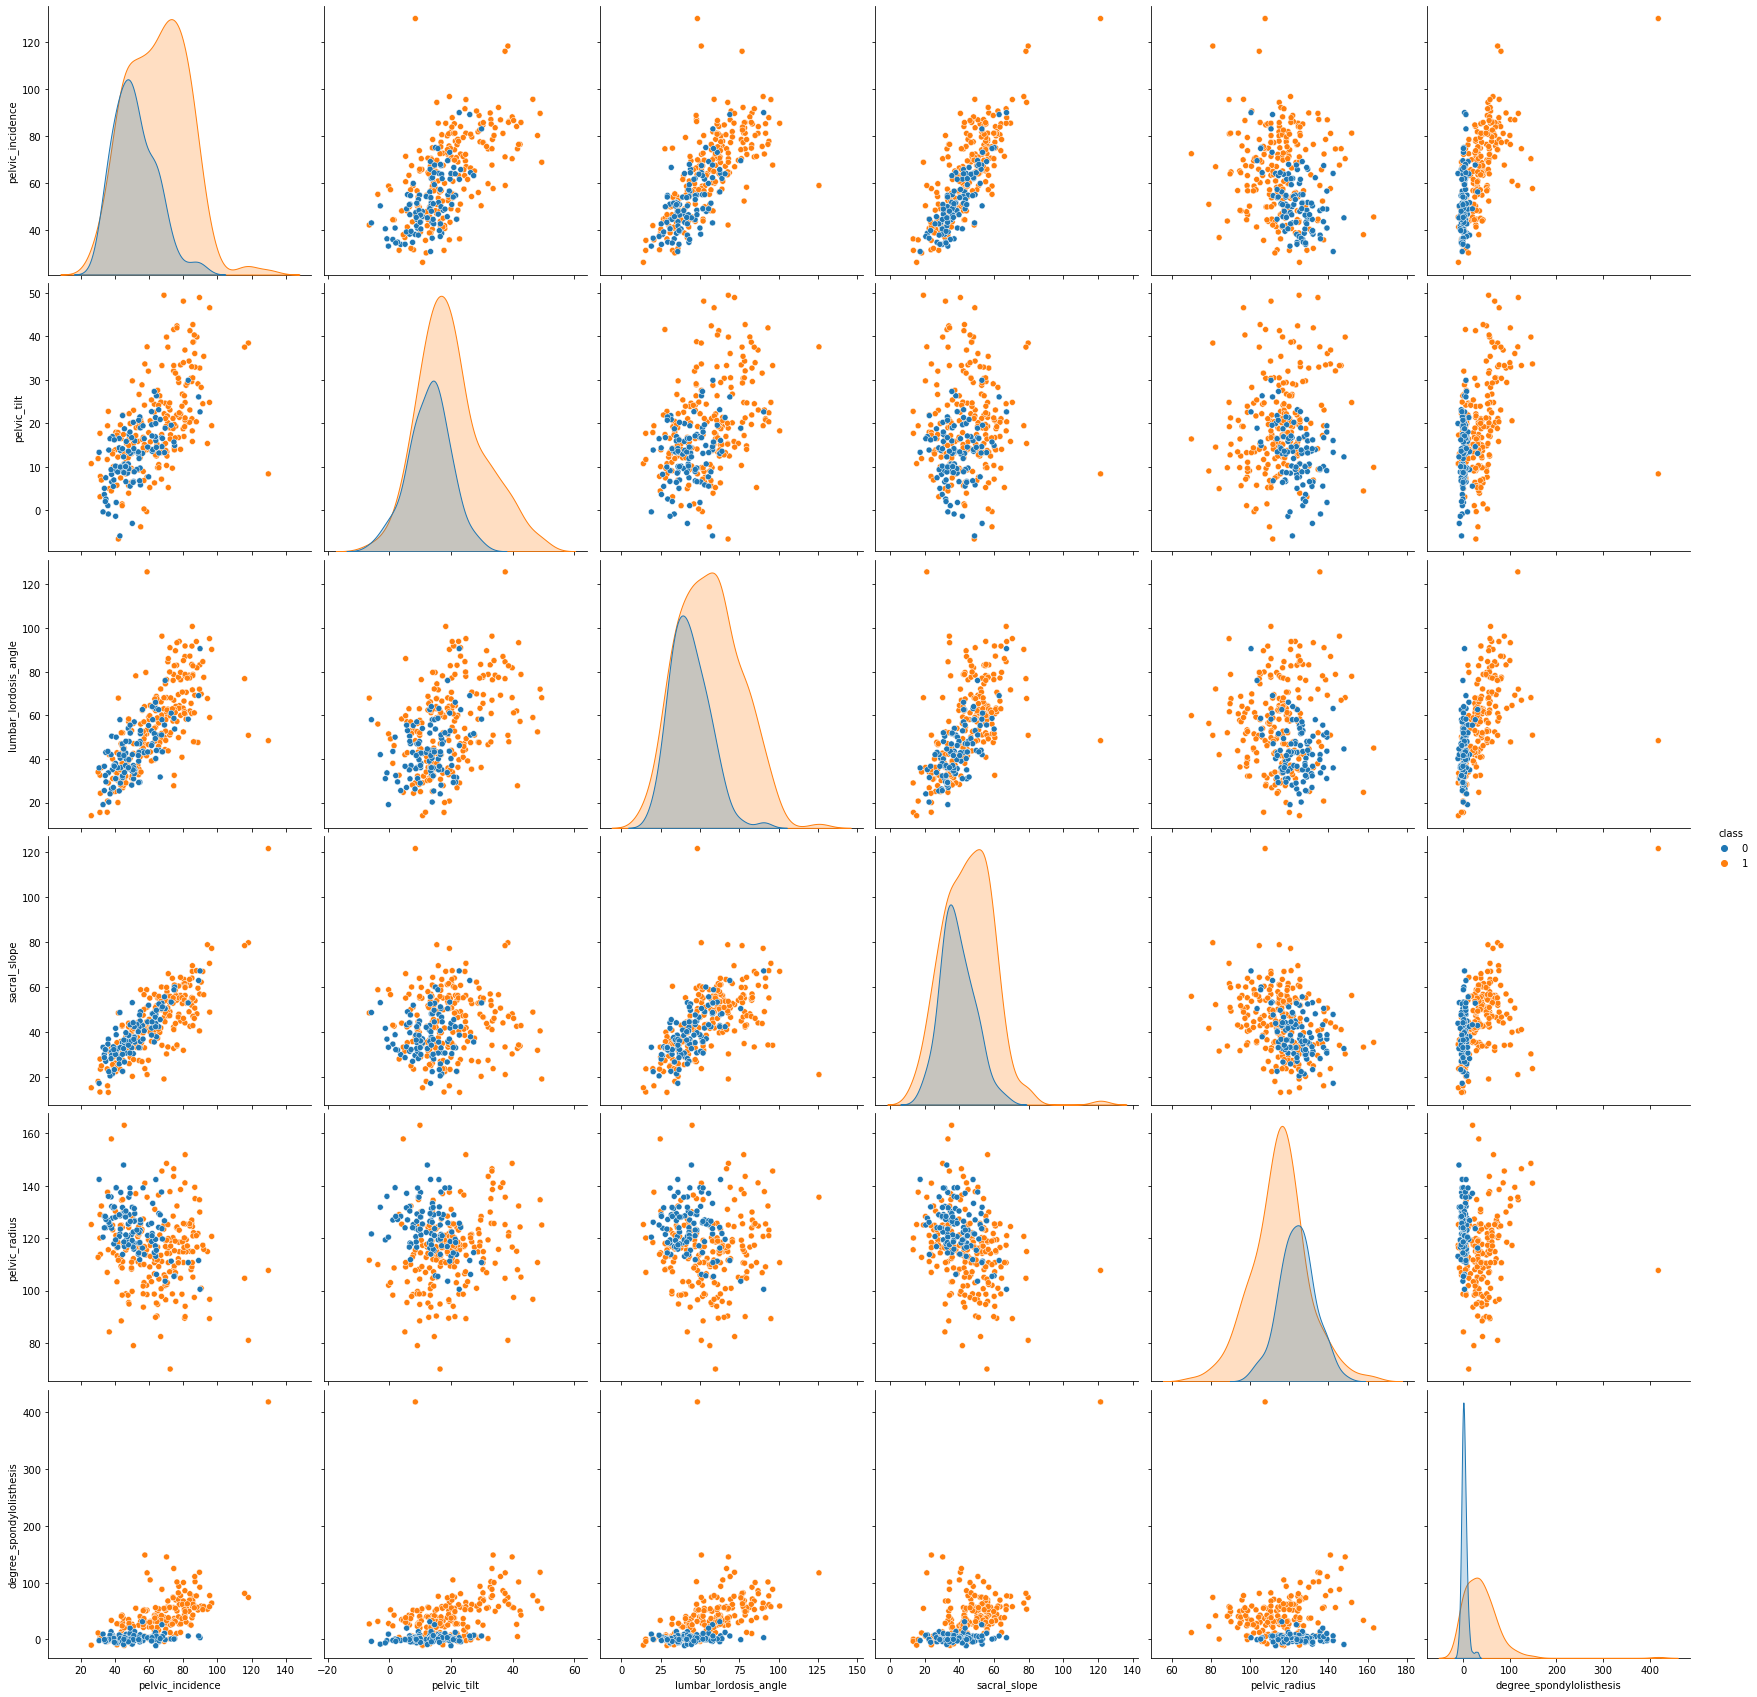

In [6]:
#I wasn't sure which scatterplot should be generated,
#so made 2 different typs of plotting prompt (pairplot and scatterplot)
sns.pairplot(df_bin, hue='class', height=4)

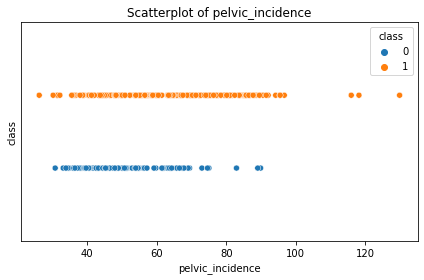

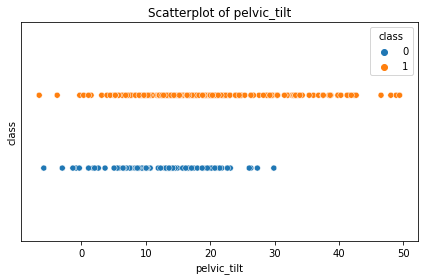

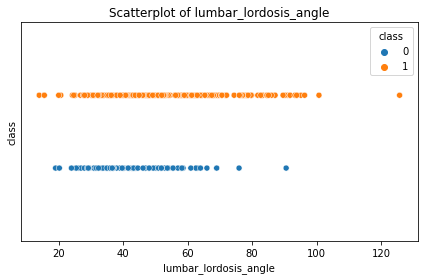

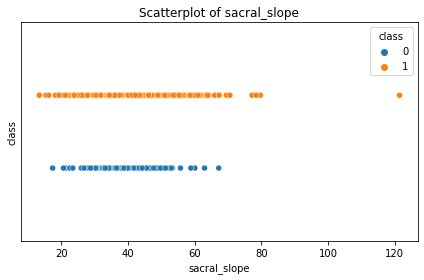

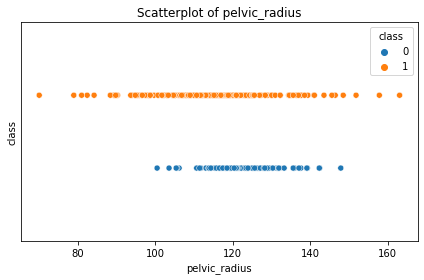

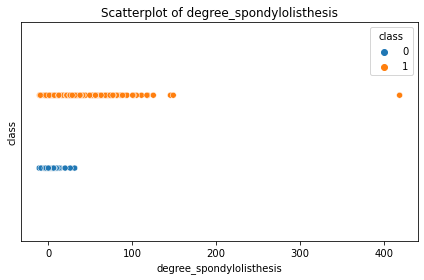

In [15]:
features = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']

# Loop for create scatterplots
for var in features:
    sns.scatterplot(x=var, y='class', data=df_bin, hue='class')  # 'class' should be the dependent variable
    plt.title(f'Scatterplot of {var}')
    plt.ylim(-1,2)
    ticks=np.linspace(-0.1,1.1,0)
    plt.yticks(ticks)
    plt.xlabel(var)
    plt.ylabel('class')
    plt.tight_layout()
    plt.show()

#### ii. Boxplots

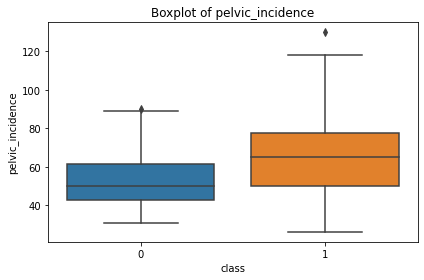

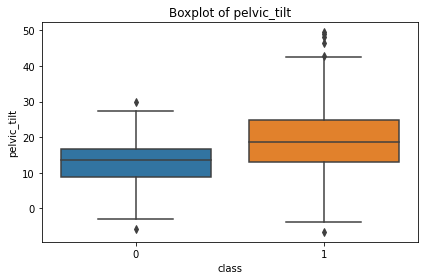

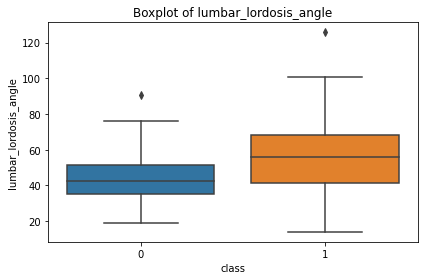

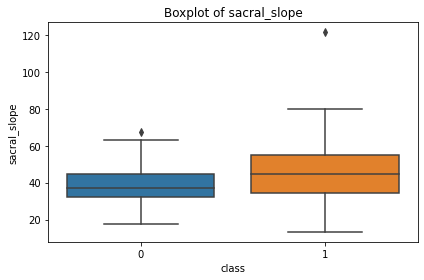

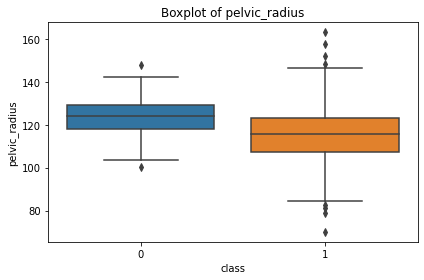

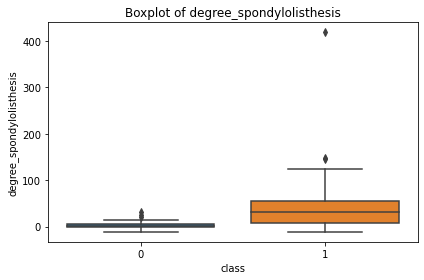

In [8]:
# boxplots for each features
for var in features:
    sns.boxplot(x='class', y=var, data=df_bin)
    plt.title(f'Boxplot of {var}')
    plt.xlabel('class')
    plt.ylabel(var)
    plt.tight_layout()
    plt.show()

#### iii. Split Data Set

Training Set Preparation

In [18]:
# Take the first 70 rows of Class 0
cl0_tr = df_bin[df_bin['class'] == 0].iloc[:70]

# Take the first 140 rows of Class 1
cl1_tr = df_bin[df_bin['class'] == 1].iloc[:140]

# concating training set to DF
tr_set = pd.concat([cl0_tr, cl1_tr])

print(len(tr_set))
tr_set.head()

210


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
210,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,0
211,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,0
212,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,0
213,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,0
214,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,0


Test Set Preparation

In [19]:
#skip the first 70 rows of class 0 and take remaining data
cl0_te = df_bin[df_bin['class'] == 0].iloc[70:]
#skip the first 140 rows of class 1 and take remaining data
cl1_te = df_bin[df_bin['class'] == 1].iloc[140:]

# Concatenate to the test set
te_set = pd.concat([cl0_te, cl1_te])

print(len(te_set))
te_set.head()

100


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
280,50.086153,13.430044,34.457541,36.656108,119.134622,3.089484,0
281,64.261507,14.497866,43.902504,49.763642,115.388268,5.951454,0
282,53.683380,13.447022,41.584297,40.236358,113.913703,2.737035,0
283,48.995958,13.113820,51.873520,35.882137,126.398188,0.535472,0
284,59.167612,14.562749,43.199158,44.604863,121.035642,2.830504,0


### (c) Classification

#### i. Euclidean Metric

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#### ii. Test Data

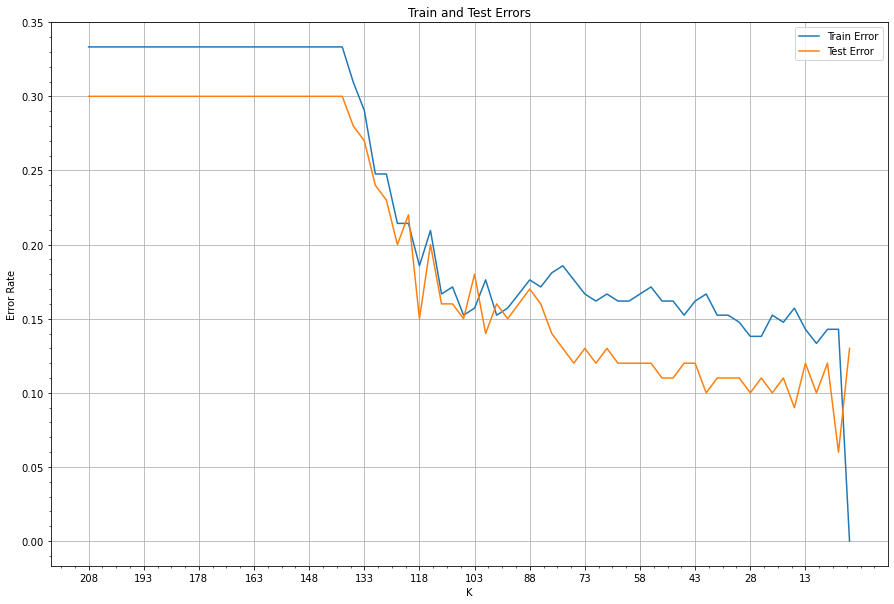


Best k Value for testing: 0.060 at 4


In [22]:
#list of k values in reverse order
k_values = list(range(208, 0, -3))

#Initialize lists of train and test errors
tr_errors = []
te_errors = []

#looping with k values
for k in k_values:
    # putting KNN classifier with list of values
    knn = KNeighborsClassifier(n_neighbors=k)

    # Split your training data into features (X_tr) and the target variable (y_tr)
    X_tr = tr_set.drop('class', axis=1)
    Y_tr = tr_set['class']

    # Split your test data into features (X_te) and the target variable (y_te)
    X_te = te_set.drop('class', axis=1)
    Y_te = te_set['class']

    # fit to knn
    knn.fit(X_tr, Y_tr)

    # Predict the class labels by majority voting
    Y_tr_pred = knn.predict(X_tr)
    Y_te_pred = knn.predict(X_te)
    
    # Calculate errors
    tr_error = 1 - accuracy_score(Y_tr, Y_tr_pred)
    te_error = 1 - accuracy_score(Y_te, Y_te_pred)

    # Append errors to the lists
    tr_errors.append(tr_error)
    te_errors.append(te_error)

error_summary = pd.DataFrame({'Training Errors': tr_errors, 'Test Errors': te_errors}, index=k_values)

# Reverse the k-values for plotting
k_values_inv = k_values[::-1]

# Plot train and test errors
plt.figure(figsize=(15,10))

plt.plot(k_values_inv, tr_errors, label='Train Error')
plt.plot(k_values_inv, te_errors, label='Test Error')

plt.grid()
plt.minorticks_on()
plt.title('Train and Test Errors')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.legend()

# Set x-ticks in reverse order
step = 5
plt.xticks(k_values_inv[::step], k_values_inv[::-step])

plt.show()

# Numerically find minimum error rate
findMinErr = min(te_errors)

# argmin for k
best_k_te = k_values[np.argmin(te_errors)]

print(f"\nBest k Value for testing: {findMinErr:.3f} at {best_k_te}")   

Memo: "Your estimate in high dimensional spaces is lousy. However, the great thing with this is that estimates of probabilities may be lousy.
Estimates of class are not as lousy. So you make your probability you're calculating the probabilities bad.
You cannot rely on it much. However, the class, whether you are whether the class that you estimate is more robust, is more reliable."

#### It seemed k=4 is in the sweetspot

In [23]:
from sklearn.metrics import confusion_matrix

# use specific neighbors
knn2 = KNeighborsClassifier(n_neighbors=4)

# refit with new k value
knn2.fit(X_tr, Y_tr)

# then predict again
y_te_pred_best = knn2.predict(X_te)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(Y_te, y_te_pred_best)

'''[[True Negative (TN)  False Positive (FP)]
 [False Negative (FN)  True Positive (TP)]]'''

print("Confusion Matrix:")
print(conf_matrix)

# Calculate True Positive Rate (TPR)
TP = conf_matrix[1][1]
FN = conf_matrix[1][0]
TPR = TP / (TP + FN)

# Calculate True Negative Rate (TNR)
TN = conf_matrix[0][0]
FP = conf_matrix[0][1]
TNR = TN / (TN + FP)

# Precision
Precision = TP / (TP + FP)

# Calculate F1-Score
F1_Score = 2 * (Precision * TPR) / (Precision + TPR)

# Print the metrics
print(f"\nTrue Positive Rate (TPR): {TPR:.2f}")
print(f"True Negative Rate (TNR): {TNR:.2f}")
print(f"Precision: {Precision:.2f}")
print(f"F1-Score: {F1_Score:.2f}")

Confusion Matrix:
[[25  5]
 [ 1 69]]

True Positive Rate (TPR): 0.99
True Negative Rate (TNR): 0.83
Precision: 0.93
F1-Score: 0.96


#### iii. Learning Curve

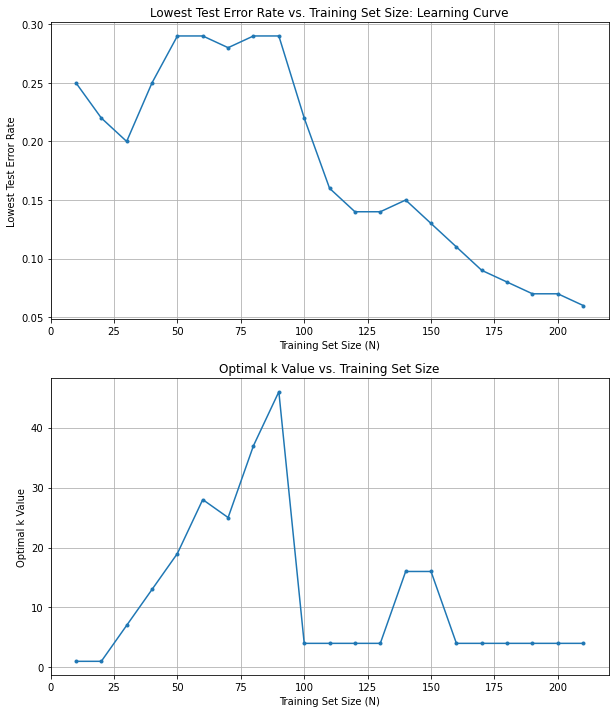

In [24]:
# Initialize best test error rates, optimal k values list
best_te_errors = []
optimal_k_values = []

def find_optimal_k(X_tr, Y_tr, X_te, k_values):
    best_error_rate = 1.0  # Initialize with a high value
    best_k = None

    for k in k_values:
        if k <= len(X_tr):  # Check if k is valid for the training set size
            knn = KNeighborsClassifier(n_neighbors=k)
            knn.fit(X_tr, Y_tr)
            te_error = 1 - knn.score(X_te, Y_te)

            if te_error < best_error_rate:
                best_error_rate = te_error
                best_k = k

    return best_error_rate, best_k

# training set sizes from 10 to 210 with a step of 10
tr_set_sizes = list(range(10, 211, 10))

# Loop for each training set size
for N in tr_set_sizes:
    n_samples_cl0 = N // 3
    n_samples_cl1 = N - n_samples_cl0

    cl0_subset = df_bin[df_bin['class'] == 0].iloc[:n_samples_cl0]
    cl1_subset = df_bin[df_bin['class'] == 1].iloc[:n_samples_cl1]

    selected_tr_set = pd.concat([cl0_subset, cl1_subset])

    X_tr = selected_tr_set.drop('class', axis=1)
    Y_tr = selected_tr_set['class']

    best_error, best_k = find_optimal_k(X_tr, Y_tr, X_te, k_values)

    best_te_errors.append(best_error)
    optimal_k_values.append(best_k)

# Plot the best test error rates against the training set sizes and optimal k values
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

axes[0].plot(tr_set_sizes, best_te_errors, marker='.')
axes[0].set_title('Lowest Test Error Rate vs. Training Set Size: Learning Curve')
axes[0].set_xlabel('Training Set Size (N)')
axes[0].set_ylabel('Lowest Test Error Rate')
axes[0].grid(True)

axes[1].plot(tr_set_sizes, optimal_k_values, marker='.')
axes[1].set_title('Optimal k Value vs. Training Set Size')
axes[1].set_xlabel('Training Set Size (N)')
axes[1].set_ylabel('Optimal k Value')
axes[1].grid(True)

plt.show()

### (d) Other Metrics

#### i. Minkowski Distance.

##### A. Manhattan Distance with p = 1.

"For example, this means that the Manhattan distance metric (L1 norm) is consistently more preferable than the
Euclidean distance metric (L2 norm) for high dimensional data mining
applications. Using the intuition derived from our analysis, we introduce
and examine a natural extension of the Lk norm to fractional distance
metrics. We show that the fractional distance metric provides more meaningful results both from the theoretical and empirical perspective. The
results show that fractional distance metrics can significantly improve
the effectiveness of standard clustering algorithms such as the k-means
algorithm." (On the Surprising Behavior of Distance Metrics
in High Dimensional Space)

     Training Errors  Test Errors
1           0.000000         0.11
6           0.138095         0.11
11          0.142857         0.11
16          0.133333         0.12
21          0.147619         0.12
26          0.166667         0.11
31          0.166667         0.12
36          0.161905         0.13
41          0.166667         0.13
46          0.171429         0.13
51          0.171429         0.14
56          0.185714         0.13
61          0.176190         0.15
66          0.185714         0.15
71          0.176190         0.14
76          0.180952         0.14
81          0.166667         0.16
86          0.152381         0.15
91          0.176190         0.20
96          0.176190         0.20
101         0.200000         0.22
106         0.204762         0.21
111         0.219048         0.23
116         0.228571         0.21
121         0.242857         0.22
126         0.261905         0.24
131         0.304762         0.28
136         0.323810         0.28
141         0.

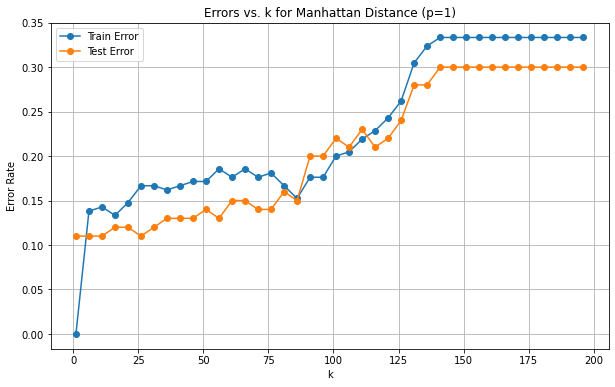

In [15]:
from sklearn.metrics import accuracy_score

k_values = list(range(1, 197, 5))

# Initialize a list to store test errors
tr_errors_minkowski = []
te_errors_minkowski = []

# Loop different values of k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=1)  # Minkowski with p=1 is Manhattan

    # Fit the KNN
    knn.fit(X_tr, Y_tr)
    y_tr_man_pred = knn.predict(X_tr)
    y_te_man_pred = knn.predict(X_te)
    
    tr_error = 1 - accuracy_score(Y_tr, y_tr_man_pred)
    te_error = 1 - accuracy_score(Y_te, y_te_man_pred)

    tr_errors_minkowski.append(tr_error)
    te_errors_minkowski.append(te_error)

# DataFrame to summarize the errors
error_summary = pd.DataFrame({'Training Errors': tr_errors_minkowski, 'Test Errors': te_errors_minkowski}, index=k_values)

# Find the best k
best_k_tr = k_values[np.argmin(tr_errors_minkowski)]
best_k_te = k_values[np.argmin(te_errors_minkowski)]
best_tr_error_man = min(tr_errors_minkowski)
best_te_error_man = min(te_errors_minkowski)

# Display the error summary
print(error_summary)
print(f"\nBest k Value for Manhattan Distance of training (p=1): {best_k_tr} when error rate:{best_tr_error_man:.3f}")
print(f"Best k Value for Manhattan Distance of testing (p=1): {best_k_te} when error rate:{best_te_error_man:.3f}")

# Display the summary table of test errors
plt.figure(figsize=(10, 6))
plt.plot(k_values, tr_errors_minkowski, marker='o', label='Train Error')
plt.plot(k_values, te_errors_minkowski, marker='o', label='Test Error')
plt.title('Errors vs. k for Manhattan Distance (p=1)')
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.legend()
plt.grid(True)
plt.show()


##### B. With log10(p) in {0.1, 0.2, 0.3, ... ,1}.

     Training Errors  Test Errors
0.1         0.138095         0.09
0.2         0.147619         0.09
0.3         0.147619         0.08
0.4         0.152381         0.08
0.5         0.147619         0.08
0.6         0.152381         0.06
0.7         0.152381         0.07
0.8         0.147619         0.08
0.9         0.147619         0.09
1.0         0.133333         0.09

Best log P Value for log of training (p=1): 1.0 when error rate: 0.133
Best log P Value for log of testing (p=1): 0.6 when error rate: 0.060


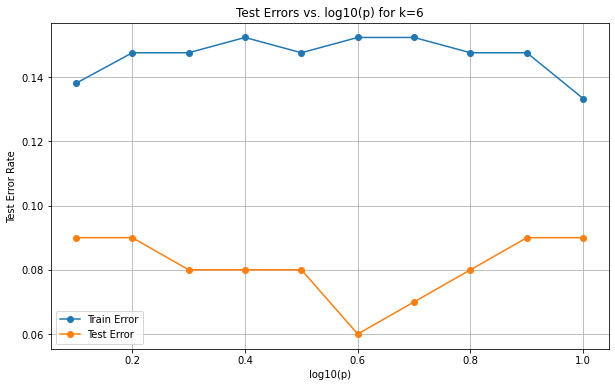

In [16]:
log_p_values = np.arange(0.1, 1.1, 0.1)  # Range from 0.1 to 1.0 in steps of 0.1

tr_errors_log = []
te_errors_log = []
log_p_list = []

for log_p in log_p_values:

    # KNN classifier with the current p value and k=6
    knn = KNeighborsClassifier(n_neighbors=6, p=(10 ** log_p))

    # Fit the KNN classifier on the training data (X_tr, y_tr)
    knn.fit(X_tr, Y_tr)

    # Make predictions on the test data (X_te)
    y_tr_log_pred = knn.predict(X_tr)
    y_te_log_pred = knn.predict(X_te)

    # Calculate the test error rate as 1 - accuracy
    tr_error = 1 - accuracy_score(Y_tr, y_tr_log_pred)
    te_error = 1 - accuracy_score(Y_te, y_te_log_pred)

    # Append the error rates and log_p value to the lists
    tr_errors_log.append(tr_error)
    te_errors_log.append(te_error)
    log_p_list.append(log_p)

# Create a DataFrame of errors
error_df_log = pd.DataFrame({'Training Errors': tr_errors_log, 'Test Errors': te_errors_log}, index=log_p_list)

best_log_p_tr = log_p_list[np.argmin(tr_errors_log)]
best_log_p_te = log_p_list[np.argmin(te_errors_log)]
best_tr_error_log = min(tr_errors_log)
best_test_error_log = min(te_errors_log)

# Display the best log10(p) and its corresponding test error
print(error_df_log)

print(f"\nBest log P Value for log of training (p=1): {best_log_p_tr} when error rate: {best_tr_error_log:.3f}")
print(f"Best log P Value for log of testing (p=1): {best_log_p_te} when error rate: {best_test_error_log:.3f}")

# Plot log10(p) versus test errors
plt.figure(figsize=(10, 6))
plt.plot(log_p_list, tr_errors_log, marker='o', label='Train Error')
plt.plot(log_p_list, te_errors_log, marker='o', label='Test Error')
plt.title('Test Errors vs. log10(p) for k=6')
plt.xlabel('log10(p)')
plt.ylabel('Test Error Rate')
plt.legend()
plt.grid(True)
plt.show()

##### C. Chebyshev Distance With p -> infinity.

     Training Errors  Test Errors
1           0.000000         0.13
6           0.152381         0.10
11          0.161905         0.12
16          0.147619         0.08
21          0.133333         0.11
26          0.157143         0.12
31          0.142857         0.12
36          0.157143         0.10
41          0.142857         0.13
46          0.161905         0.12
51          0.166667         0.12
56          0.166667         0.12
61          0.176190         0.14
66          0.161905         0.13
71          0.180952         0.14
76          0.176190         0.11
81          0.171429         0.14
86          0.171429         0.12
91          0.161905         0.15
96          0.161905         0.14
101         0.171429         0.19
106         0.171429         0.18
111         0.180952         0.18
116         0.176190         0.18
121         0.209524         0.21
126         0.223810         0.21
131         0.247619         0.25
136         0.319048         0.28
141         0.

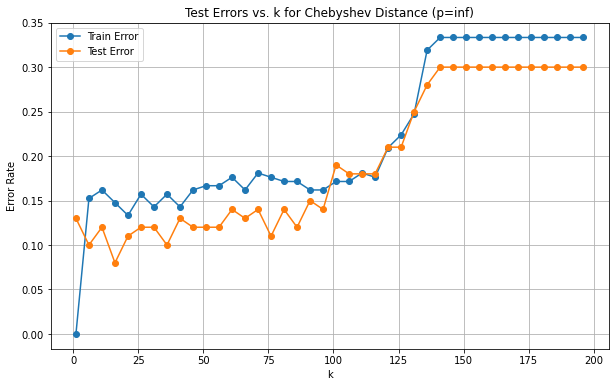

In [17]:
# Initialize a list to store test errors
tr_errors_che = []
te_errors_che = []

# Loop through different values of k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, p=np.inf)  # Minkowski with p=np.inf is Chebyshev 

    # Fit the KNN classifier on the training data
    knn.fit(X_tr, Y_tr)
    
    y_tr_che_pred = knn.predict(X_tr)
    y_te_che_pred = knn.predict(X_te)
    
    tr_error_che = 1 - accuracy_score(Y_tr, y_tr_che_pred)
    te_error_che = 1 - accuracy_score(Y_te, y_te_che_pred)

    tr_errors_che.append(tr_error_che)
    te_errors_che.append(te_error_che)

# Create a DataFrame to summarize the errors
error_df_che = pd.DataFrame({'Training Errors': tr_errors_che, 'Test Errors': te_errors_che}, index=k_values)

# Find the best k
best_k_tr_che = k_values[np.argmin(tr_errors_che)]
best_k_te_che = k_values[np.argmin(te_errors_che)]
best_tr_error_che = min(tr_errors_che)
best_te_error_che = min(te_errors_che)

# print error summary
print(error_df_che)
print(f"\nBest k Value for Chebyshev by training: {best_k_tr_che}, its error rate: {best_tr_error_che:.3f}")
print(f"Best k Value for Chebyshev by testing: {best_k_te_che}, its error rate: {best_te_error_che:.3f}")

# Plot them
plt.figure(figsize=(10, 6))
plt.plot(k_values, tr_errors_che, marker='o', label='Train Error')
plt.plot(k_values, te_errors_che, marker='o', label='Test Error')
plt.title('Test Errors vs. k for Chebyshev Distance (p=inf)')
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.legend()
plt.grid(True)
plt.show()

#### ii. Mahalanobis Distance.

     Training Errors  Test Errors
1           0.000000         0.16
6           0.133333         0.14
11          0.157143         0.17
16          0.157143         0.18
21          0.152381         0.20
26          0.176190         0.19
31          0.166667         0.19
36          0.166667         0.18
41          0.180952         0.21
46          0.171429         0.22
51          0.171429         0.21
56          0.176190         0.20
61          0.176190         0.24
66          0.166667         0.22
71          0.171429         0.24
76          0.166667         0.21
81          0.171429         0.22
86          0.185714         0.22
91          0.204762         0.23
96          0.209524         0.24
101         0.219048         0.25
106         0.219048         0.24
111         0.271429         0.25
116         0.276190         0.28
121         0.319048         0.28
126         0.328571         0.29
131         0.333333         0.30
136         0.333333         0.30
141         0.

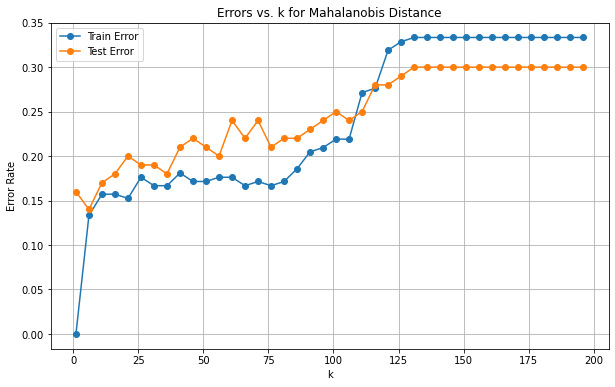

In [18]:
from scipy.spatial import distance
from sklearn.metrics import accuracy_score

# list creation
tr_errors_mahal = []
te_errors_mahal = []

best_tr_error_rate = 1.0  # start with a high value
best_te_error_rate = 1.0  
best_k_te = None
best_k_tr = None

# Loop through different values of k
for k in k_values:
    # Calculate the inverse of the covariance
    cov_inv = np.linalg.inv(np.cov(X_tr.T))
    
    # knn classifier with custom Mahalanobis Distance metric
    knn = KNeighborsClassifier(n_neighbors=k, metric='mahalanobis', metric_params={'VI': cov_inv})

    # Fit the KNN classifier on the training data
    knn.fit(X_tr, Y_tr)
  
    # Make predictions on the test data
    y_tr_pred_mahal = knn.predict(X_tr)
    y_te_pred_mahal = knn.predict(X_te)

    # Calculate the test error rate as 1 - accuracy
    tr_error = 1 - accuracy_score(Y_tr, y_tr_pred_mahal)
    te_error = 1 - accuracy_score(Y_te, y_te_pred_mahal)

    tr_errors_mahal.append(tr_error)
    te_errors_mahal.append(te_error)
    
    # Check if the current test error is the best so far
    if tr_error < best_tr_error_rate:
        best_tr_error_rate = tr_error
        best_k_tr = k

    if te_error < best_te_error_rate:
        best_te_error_rate = te_error
        best_k_te = k

# Create a DataFrame for the errors
error_df_mahal = pd.DataFrame({'Training Errors': tr_errors_mahal, 'Test Errors': te_errors_mahal}, index=k_values)
print(error_df_mahal)

print(f"\nBest k Value for Mahalanobis Distance: {best_k_tr} with training error rate: {best_tr_error_rate:.3f}")
print(f"Best k Value for Mahalanobis Distance: {best_k_te} with test error rate: {best_te_error_rate:.3f}")

# Display the plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, tr_errors_mahal, marker='o', label='Train Error')
plt.plot(k_values, te_errors_mahal, marker='o', label='Test Error')
plt.title('Errors vs. k for Mahalanobis Distance')
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.legend()
plt.grid(True)
plt.show()

### (e) Weighted Decision

The majority polling decision can be replaced by weighted decision, in which the
weight of each point in voting is inversely proportional to its distance from the
query/test data point. In this case, closer neighbors of a query point will have
a greater influence than neighbors which are further away. Use weighted voting
with Euclidean, Manhattan, and Chebyshev distances and report the best test
errors when k ∈ {1, 6, 11, 16, . . . , 196}

Test Errors

In [19]:
# Define the distance metrics
distance_metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']

In [20]:
# a dictionary to store test errors for each metric and voting type

te_errors_all = {metrics: {'majority_polling': [], 'weighted_voting': []} for metrics in distance_metrics}

# Initialize dictionaries to store the best k values for each metric
best_k_values_majority = {metrics: None for metrics in distance_metrics}
best_k_values_weighted = {metrics: None for metrics in distance_metrics}

# Loop through each distance metric
for metrics in distance_metrics:
    # Initialize lists to store test errors for the current metric and voting type
    metric_te_errors_majority = []
    metric_te_errors_weighted = []

    # variables
    best_error_rate_majority = 1.0  # Initialize with a high value
    best_k_majority = None
    best_error_rate_weighted = 1.0
    best_k_weighted = None

    # Loop through different values of k
    for k in k_values:
        # KNN classifiers with the current metric and k value
        knn_majority = KNeighborsClassifier(n_neighbors=k, metric=metrics)
        knn_weighted = KNeighborsClassifier(n_neighbors=k, metric=metrics, weights='distance')

        # Fit the KNN classifiers on the training data
        knn_majority.fit(X_tr, Y_tr)
        knn_weighted.fit(X_tr, Y_tr)

        # Make predictions on the test data for majority polling, weighted voting
        y_pred_majority = knn_majority.predict(X_te)
        y_pred_weighted = knn_weighted.predict(X_te)

        # Calculate the test error rates for majority polling and weighted voting
        te_error_majority = 1 - accuracy_score(Y_te, y_pred_majority)
        te_error_weighted = 1 - accuracy_score(Y_te, y_pred_weighted)

        # Append the test errors to the respective lists
        metric_te_errors_majority.append(te_error_majority)
        metric_te_errors_weighted.append(te_error_weighted)

        # Check if the current error rate is the best so far for majority polling
        if te_error_majority < best_error_rate_majority:
            best_error_rate_majority = te_error_majority
            best_k_majority = k

        # Check if the current error rate is the best so far for weighted voting
        if te_error_weighted < best_error_rate_weighted:
            best_error_rate_weighted = te_error_weighted
            best_k_weighted = k

    # Store the errors for the current metric and voting types in the dictionary
    te_errors_all[metrics]['majority_polling'] = metric_te_errors_majority
    te_errors_all[metrics]['weighted_voting'] = metric_te_errors_weighted

    # Store the best k values in the dictionaries
    best_k_values_majority[metrics] = best_k_majority
    best_k_values_weighted[metrics] = best_k_weighted

# Create DataFrames
test_error_df_majority = pd.DataFrame({metrics: te_errors_all[metrics]['majority_polling'] for metrics in distance_metrics}, index=k_values)
test_error_df_weighted = pd.DataFrame({metrics: te_errors_all[metrics]['weighted_voting'] for metrics in distance_metrics}, index=k_values)

Test Error Summary for Majority Polling:
     euclidean  manhattan  chebyshev  minkowski
1         0.13       0.11       0.13       0.13
6         0.08       0.11       0.10       0.08
11        0.12       0.11       0.12       0.12
16        0.09       0.12       0.08       0.09
21        0.10       0.12       0.11       0.10
26        0.11       0.11       0.12       0.11
31        0.11       0.12       0.12       0.11
36        0.11       0.13       0.10       0.11
41        0.11       0.13       0.13       0.11
46        0.12       0.13       0.12       0.12
51        0.11       0.14       0.12       0.11
56        0.12       0.13       0.12       0.12
61        0.12       0.15       0.14       0.12
66        0.13       0.15       0.13       0.13
71        0.13       0.14       0.14       0.13
76        0.12       0.14       0.11       0.12
81        0.13       0.16       0.14       0.13
86        0.16       0.15       0.12       0.16
91        0.16       0.20       0.15       0.16

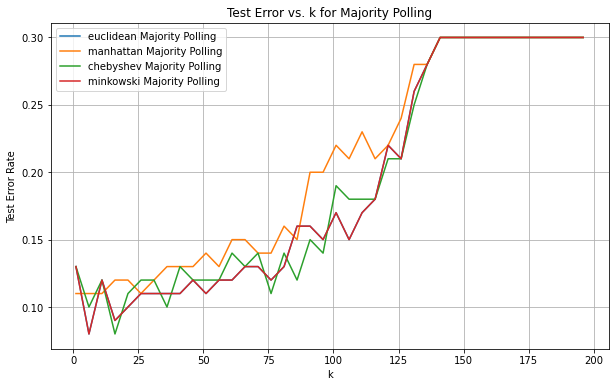


Best k Values for Each Metric in Majority Polling:
{'euclidean': 6, 'manhattan': 1, 'chebyshev': 16, 'minkowski': 6}


In [21]:
# Display the summary tables of test errors for majority polling and weighted voting
print("Test Error Summary for Majority Polling:")
print(test_error_df_majority)

plt.figure(figsize=(10, 6))
for metrics in distance_metrics:
    plt.plot(k_values, test_error_df_majority[metrics], label=f'{metrics} Majority Polling')

plt.title('Test Error vs. k for Majority Polling')
plt.xlabel('k')
plt.ylabel('Test Error Rate')
plt.legend()
plt.grid(True)
plt.show()

# Display the best k values for each distance metric in Majority Polling
print("\nBest k Values for Each Metric in Majority Polling:")
print(best_k_values_majority)

Test Error Summary for Weighted Voting:
     euclidean  manhattan  chebyshev  minkowski
1         0.13       0.11       0.13       0.13
6         0.10       0.11       0.13       0.10
11        0.12       0.11       0.12       0.12
16        0.11       0.12       0.11       0.11
21        0.11       0.11       0.12       0.11
26        0.11       0.10       0.12       0.11
31        0.11       0.11       0.11       0.11
36        0.11       0.11       0.11       0.11
41        0.11       0.11       0.11       0.11
46        0.11       0.11       0.12       0.11
51        0.11       0.12       0.12       0.11
56        0.11       0.12       0.12       0.11
61        0.11       0.13       0.11       0.11
66        0.11       0.13       0.13       0.11
71        0.11       0.11       0.12       0.11
76        0.12       0.12       0.12       0.12
81        0.12       0.14       0.12       0.12
86        0.13       0.14       0.14       0.13
91        0.14       0.13       0.13       0.14


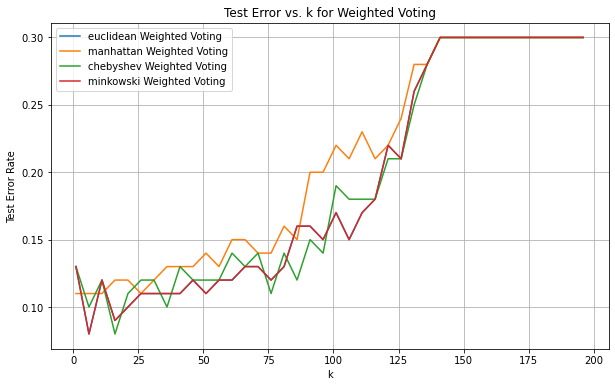


Best k Values for Each Metric in Weighted Voting:
{'euclidean': 6, 'manhattan': 26, 'chebyshev': 16, 'minkowski': 6}


In [22]:
# Display the summary tables of test errors for majority polling and weighted voting
print("Test Error Summary for Weighted Voting:")
print(test_error_df_weighted)

plt.figure(figsize=(10, 6))
for metrics in distance_metrics:
    plt.plot(k_values, test_error_df_majority[metrics], label=f'{metrics} Weighted Voting')

plt.title('Test Error vs. k for Weighted Voting')
plt.xlabel('k')
plt.ylabel('Test Error Rate')
plt.legend()
plt.grid(True)
plt.show()

# Display the best k values for each distance metric in weighted voting
print("\nBest k Values for Each Metric in Weighted Voting:")
print(best_k_values_weighted)

Training Errors

In [23]:
tr_errors_all = {metrics: {'majority_polling_tr': [], 'weighted_voting_tr': []} for metrics in distance_metrics}

best_k_values_majority_tr = {metrics: None for metrics in distance_metrics}
best_k_values_weighted_tr = {metrics: None for metrics in distance_metrics}

for metrics in distance_metrics:

    metric_tr_errors_majority = []
    metric_tr_errors_weighted = []

    # Initialize variables to track the best training error rate and the corresponding k
    best_error_rate_majority_tr = 1.0  # Initialize with a high value
    best_k_majority_tr = None
    best_error_rate_weighted_tr = 1.0
    best_k_weighted_tr = None

    # Loop through different values of k
    for k in k_values:
        # KNN classifiers
        knn_majority = KNeighborsClassifier(n_neighbors=k, metric=metrics)

        # to compute training errors for weighted voting while keeping the test set separate, 
        # should fit the model with weights='uniform' during training and then calculate training errors based on this model's predictions.
        # otherwise all error rates come 0 (100% accuracy)
        
        knn_weighted = KNeighborsClassifier(n_neighbors=k, metric=metrics, weights='uniform') 

        # Fit
        knn_majority.fit(X_tr, Y_tr)
        knn_weighted.fit(X_tr, Y_tr)

        # Make predictions on the training data for different methods
        y_pred_majority_tr = knn_majority.predict(X_tr)
        y_pred_weighted_tr = knn_weighted.predict(X_tr)

        # Calculate the training error rates
        tr_error_majority = 1 - accuracy_score(Y_tr, y_pred_majority_tr)
        tr_error_weighted = 1 - accuracy_score(Y_tr, y_pred_weighted_tr)

        # Append them
        metric_tr_errors_majority.append(tr_error_majority)
        metric_tr_errors_weighted.append(tr_error_weighted)

        # Check if the current error rate is the lowest so far for majority polling
        if tr_error_majority < best_error_rate_majority_tr:
            best_error_rate_majority_tr = tr_error_majority
            best_k_majority_tr = k

        # Check if the current error rate is the loewest so far for weighted voting
        if tr_error_weighted < best_error_rate_weighted_tr:
            best_error_rate_weighted_tr = tr_error_weighted
            best_k_weighted_tr = k

    # Store the errors for the current metric and voting types in the dictionary
    tr_errors_all[metrics]['majority_polling_tr'] = metric_tr_errors_majority
    tr_errors_all[metrics]['weighted_voting_tr'] = metric_tr_errors_weighted

    # Store the best k values in the dictionaries
    best_k_values_majority_tr[metrics] = best_k_majority_tr
    best_k_values_weighted_tr[metrics] = best_k_weighted_tr

# Create DataFrames for the errors
tr_error_df_majority = pd.DataFrame({metrics: tr_errors_all[metrics]['majority_polling_tr'] for metrics in distance_metrics}, index=k_values)
tr_error_df_weighted = pd.DataFrame({metrics: tr_errors_all[metrics]['weighted_voting_tr'] for metrics in distance_metrics}, index=k_values)

Training Error Summary for Majority Polling:
     euclidean  manhattan  chebyshev  minkowski
1     0.000000   0.000000   0.000000   0.000000
6     0.147619   0.138095   0.152381   0.147619
11    0.147619   0.142857   0.161905   0.147619
16    0.157143   0.133333   0.147619   0.157143
21    0.138095   0.147619   0.133333   0.138095
26    0.142857   0.166667   0.157143   0.142857
31    0.147619   0.166667   0.142857   0.147619
36    0.161905   0.161905   0.157143   0.161905
41    0.161905   0.166667   0.142857   0.161905
46    0.152381   0.171429   0.161905   0.152381
51    0.157143   0.171429   0.166667   0.157143
56    0.171429   0.185714   0.166667   0.171429
61    0.161905   0.176190   0.176190   0.161905
66    0.166667   0.185714   0.161905   0.166667
71    0.166667   0.176190   0.180952   0.166667
76    0.176190   0.180952   0.176190   0.176190
81    0.166667   0.166667   0.171429   0.166667
86    0.161905   0.152381   0.171429   0.161905
91    0.166667   0.176190   0.161905   0.16

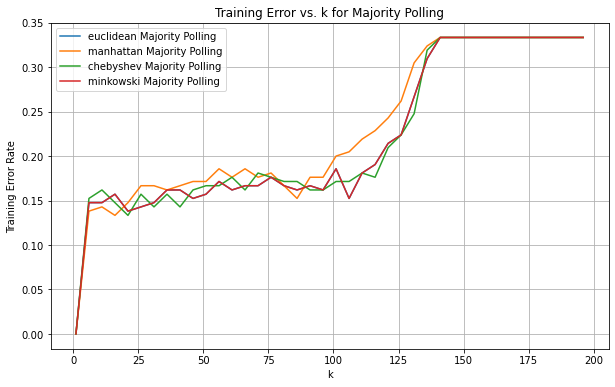


Best k Values for Each Metric in Majority Polling for training:
{'euclidean': 1, 'manhattan': 1, 'chebyshev': 1, 'minkowski': 1}


In [24]:
print("Training Error Summary for Majority Polling:")
print(tr_error_df_majority)

plt.figure(figsize=(10, 6))
for metrics in distance_metrics:
    plt.plot(k_values, tr_error_df_majority[metrics], label=f'{metrics} Majority Polling')

plt.title('Training Error vs. k for Majority Polling')
plt.xlabel('k')
plt.ylabel('Training Error Rate')
plt.legend()
plt.grid(True)
plt.show()

print("\nBest k Values for Each Metric in Majority Polling for training:")
print(best_k_values_majority_tr)

Training Error Summary for Weighted Voting:
     euclidean  manhattan  chebyshev  minkowski
1     0.000000   0.000000   0.000000   0.000000
6     0.147619   0.138095   0.152381   0.147619
11    0.147619   0.142857   0.161905   0.147619
16    0.157143   0.133333   0.147619   0.157143
21    0.138095   0.147619   0.133333   0.138095
26    0.142857   0.166667   0.157143   0.142857
31    0.147619   0.166667   0.142857   0.147619
36    0.161905   0.161905   0.157143   0.161905
41    0.161905   0.166667   0.142857   0.161905
46    0.152381   0.171429   0.161905   0.152381
51    0.157143   0.171429   0.166667   0.157143
56    0.171429   0.185714   0.166667   0.171429
61    0.161905   0.176190   0.176190   0.161905
66    0.166667   0.185714   0.161905   0.166667
71    0.166667   0.176190   0.180952   0.166667
76    0.176190   0.180952   0.176190   0.176190
81    0.166667   0.166667   0.171429   0.166667
86    0.161905   0.152381   0.171429   0.161905
91    0.166667   0.176190   0.161905   0.166

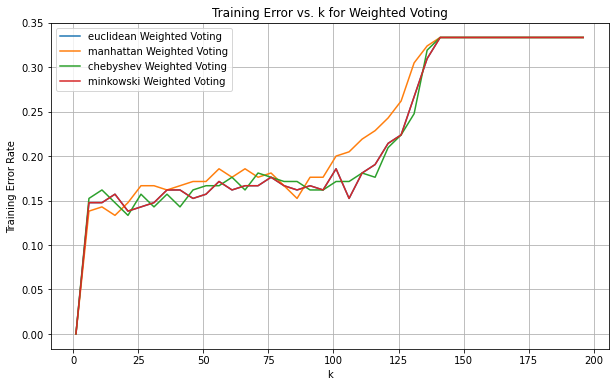


Best k Values for Each Metric in Weighted Voting for training:
{'euclidean': 1, 'manhattan': 1, 'chebyshev': 1, 'minkowski': 1}


In [25]:
print("Training Error Summary for Weighted Voting:")
print(tr_error_df_weighted)

plt.figure(figsize=(10, 6))
for metrics in distance_metrics:
    plt.plot(k_values, tr_error_df_weighted[metrics], label=f'{metrics} Weighted Voting')

plt.title('Training Error vs. k for Weighted Voting')
plt.xlabel('k')
plt.ylabel('Training Error Rate')
plt.legend()
plt.grid(True)
plt.show()

print("\nBest k Values for Each Metric in Weighted Voting for training:")
print(best_k_values_weighted_tr)

### (f) Training Error Rate

The lowest training error rate is 0 since in the most case fitting from training data set did the same predictions for the training data set when using k=1. 

#### THE END